# Исследование объявлений о продаже квартир

## Краткое описание проекта
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Описание входных данных
Файл __/datasets/real_estate_data.csv__, содержащий данные о выставленных на продажу квартирах. Для каждой квартиры указана следующая информация: 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### План выполнения задания
1. Изучить полученные данные, обработать пропуски, привести данные к нужным типам;
2. Добавить в таблицу параметры: 
  - цена квадратного метра, 
  - день недели, месяц и год публикации объявления,
  - этаж квартиры (первый, последний, другой),
  - соотношение жилой и общей площади, отношение площади кухни к общей площади.
3. Изучить и построить гистограммы для параметров:
  - площадь, цена, число комнат, высота потолков;
4. Изучить параметр "время продажи квартиры", построить гистограмму, посчитайть среднее и медиану;
5. Рассмотреть зависимость цены квартиры от следующих параметров:
  - площадь, число комнат, этаж;
  - удалённость от центра;
  - дата размещения: день недели, месяц и год;
6. Определить 10 населённых пунктов с наибольшим числом объявлений, посчитать среднюю цену квадратного метра и выделить населённые пункты с самой высокой и низкой стоимостью жилья;
7. Для квартир в Санкт-Петербурге выделить записи, относящиеся к центру города, изучить и построить гистограммы для параметров: площадь, цена, число комнат, высота потолков; выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).


## Шаг 1. Первичное изучение данных
   
Импортируем необходимые модули:

In [188]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 4.0)
pd.set_option('display.max_columns', 100)

Откроем полученный файл, сохраним таблицу в переменную real_estate и выведем первые несколько строк. Для удобства отображения разобьем вывод на 2 части:

In [189]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate.iloc[:5,:13]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0


In [190]:
real_estate.iloc[:5,13:]

,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Также выведем общую информацию о нашей таблице и проверим, нет ли в ней дублированных записей:

In [191]:
print(real_estate.info())
print('\nДубликатов', real_estate.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице содержится 23699 записей, разбитых на 22 столбца. Каждая запись соответствует объявлению о продаже квартиры, в столбцах содержится информация о продаваемой недвижимости (цена, метраж, количество комнат и т.д.).  Типы данных: __int64__ (целочисленный), __float64__ (вещественный с плавающей точкой), __bool__ (булев) и __object__ (строковый). Во многих столбцах таблицы присутствуют пропуски.
На следующем шаге мы определим пропуски в столбцах таблицы и, по необходимости, заполним их.

## Шаг 2. Предобработка данных

### 1. Заполнение пропусков
Изучим столбцы на предмет наличия пропусков и, где это уместно, заполним их:
##### Столбец is_apartment
В столбце __is_apartment__ заполнено всего 2775 значений из 23699 (чуть больше 10 процентов). Посмотрим на распределение значений:

In [192]:
real_estate['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Очевидно, что в таком виде столбец не несет какой-либо значимой информационной нагрузки. О проблеме с его заполнением следует сообщить заказчику, а пока считаем возможным исключить его из рассмотрения.

In [193]:
real_estate.drop(columns='is_apartment', inplace=True) 
# 'is_apartment' in real_estate.columns                    #Проверка

##### Столбцы balcony, parks_around3000, ponds_around3000

Логично предположить, что пропуски в столбце __balcony__ означают, в продаваемой квартире нет балкона. Заполним их значением '0':

In [194]:
real_estate['balcony'].fillna(0, inplace=True)

Аналогичным образом поступим со столбцами __parks_around3000__ и __ponds_around3000__ - пропуски в них значат, что поблизости от квартиры нет парков и водоемов соответственно: 

In [195]:
real_estate['parks_around3000'].fillna(0, inplace=True)
real_estate['ponds_around3000'].fillna(0, inplace=True)
# print (real_estate[['balcony', 'parks_around3000', 'ponds_around3000']].isna().sum())   #Проверка

##### Столбцы parks_nearest, ponds_nearest

Как нетрудно догадаться, если поблизости от продаваемой квартиры нет парков или водоемов, то не будет указано и расстояние до них, а значит пустые значения столбцов __parks_nearest__ и __ponds_nearest__ должны соответствовать значениям '0' в __parks_around3000__ и __ponds_around3000.__ Проверим это предположение - найдем записи, для которых оно не выполняется:

In [196]:
print('Парки')
print(real_estate.query('(parks_around3000 == 0) != (parks_nearest.isna())')[['parks_around3000', 'parks_nearest']])
print('\nВодоемы')
print(real_estate.query('(ponds_around3000 == 0) != (ponds_nearest.isna())')[['ponds_around3000', 'ponds_nearest']])

Парки
       parks_around3000  parks_nearest
1590                0.0         3064.0
10959               0.0         3190.0
19208               0.0         3013.0
19430               0.0         3190.0

Водоемы
Empty DataFrame
Columns: [ponds_around3000, ponds_nearest]
Index: []


Наша догадка подтвердилась - пропуски в полях __parks_nearest__ и __ponds_nearest__ есть только у квартир, в радиусе 3 км от которых нет парков или водоемов. Исходя из этого, заполнять их какими-либо значениями не имеет смысла.

Также мы нашли 4 записи, где расстояние до ближайшего парка превышает 3000 м, что в принципе не является ошибкой (в столбце __parks_around3000__ при этом указано верное значение 0).

##### Столбцы living_area, kitchen_area

Пропуски в данных столбцах могли возникнуть из-за того, что соответствующая информация отсутствовала в объявлении о продаже квартиры. Кроме того, они также могут быть связаны с определенными особенностями самого объекта недвижимости: например, можно заметить, что площадь кухни не указана для квартир-студий и квартир со свободной планировкой (что логично, поскольку в них обычно нет отдельной кухни):

In [197]:
print('Проверка: квартир со свободной планировкой/студий, у которых указана площадь кухни:', end=' ')
print(real_estate.query('(open_plan | studio) == True and kitchen_area.notna()').shape[0])

Проверка: квартир со свободной планировкой/студий, у которых указана площадь кухни: 0


Пропуски в данном столбце заполнять не будем.

##### Столбец days_exposition
Поскольку в данном столбце отображается количество дней, прошедшее с момента размещения объявления до его снятия, логично предположить, что пропуски означают, что на момент выгрузки таблицы эти квартиры еще не были проданы. Заполнять столбец рассчетными значениями не имеет смысла (мы не можем знать, сколько еще будут висеть эти объявления), так что оставим в нем пропуски, которые будут служить сигналом, что объявления не сняты.


##### Остальные столбцы (ceiling_height, floors_total, locality_name, airports_nearest и cityCenters_nearest 

В оставшихся столбцах заполнение пустых значений также считаем нецелесообразным. При этом исходим из следующих соображений:
- каких либо закономерностей в возникновении пропусков при исследовании таблицы не обнаружено. Причинами их появления могут быть отсутствие соответствующей информации в объявлении, сбои при сохранении записей, либо (для полей, заполняемых автоматически на основе картографических данных) неправильная работа соответствующего алгоритма;
- количество пропусков в некоторых столбцах весьма значительно, поэтому их заполнение средними или медианными значениями может повлиять на результаты наших исследований;
- количество непустых значений в интересующих нас столбцах достаточно для дальнейшего анализа.

### 2. Преобразование типов
Произведем преобразование типов данных в столбцах: 

1. числовые значения, где это уместно, приведем к типу __uint__ (целое число без знака). Высоту потолков, общую и жилую площадь, а также площадь кухни оставим в вещественном виде (округлять их до целой части нам не нужно).

In [198]:
for column in real_estate.columns:
    real_estate[column] = pd.to_numeric(real_estate[column], downcast='unsigned', errors='ignore')

real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23699 non-null uint8
last_price              23699 non-null uint32
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null uint8
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null uint8
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null uint8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null uint8
parks_nearest           8079 non-null float64
ponds_around3000        23699 non-null uint8
ponds_nearest       

Как видно, столбцы с пропусками преобразовать к типу int не удалось, поскольку значения NaN в pandas относятся к вещественному типу. Поскольку мы приняли решение не заполнять пустые значения, оставим тип этих столбцов без изменения.

 2. Преобразуем столбец __first_day_exposition__ в __datetime:__

In [199]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%d')

### Вывод:
Нами произведена обработка пропусков в таблице.
В некоторых столбцах (__balcony, parks_around3000, ponds_around3000__) пропущенные значения заменены на нули. В остальных столбцах замену пропусков решено не производить. По каждому столбцу нами сделаны предположения о причинах появления пустых значений.
После этого мы преобразовали некоторые столбцы к целочисленному типу, а столбец __first_day_exposition__ - к типу __datetime__.

## Шаг 3. Расчет дополнительных параметров
### 1. Цена за квадратный метр

Добавим в таблицу столбец __price_per_sqm__, в котором будет рассчитана цена одного квадратного метра:

In [200]:
real_estate['price_per_sqm'] = (real_estate['last_price'] / real_estate['total_area']).astype('int')
real_estate[['last_price', 'total_area', 'price_per_sqm']].head()            #Проверка

,last_price,total_area,price_per_sqm
0,13000000,108.0,120370
1,3350000,40.4,82920
2,5196000,56.0,92785
3,64900000,159.0,408176
4,10000000,100.0,100000


### 2. День недели, месяц и год публикации
Для каждой записи определим год, месяц и день недели, когда она была опубликована, и запишем в соответствующие столбцы:

In [201]:
real_estate['fde_weekday'] = real_estate['first_day_exposition'].dt.weekday
real_estate['fde_month'] = real_estate['first_day_exposition'].dt.month
real_estate['fde_year'] = real_estate['first_day_exposition'].dt.year
real_estate[['first_day_exposition', 'fde_weekday', 'fde_month', 'fde_year']].head()    # Проверка              

,first_day_exposition,fde_weekday,fde_month,fde_year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


### 3. Этаж
Разобьем наши записи на следующие категории: 
1. Квартиры на первом этаже;
2. Квартиры на последнем этаже;
3. Квартиры на прочих этажах.

Заметим сперва, что в столбце __floors_total__, который необходим для такой категоризации, есть пропуски. Посчитаем их количество:

In [202]:
print('Пропусков в столбце:', real_estate['floors_total'].isna().sum())

Пропусков в столбце: 86


С учетом их малого количества (всего 86 из 23699) отнесем эти квартиры к категории "Другой этаж" (разумеется, если только они расположены не на первом этаже).
Добавим столбец __floor_cat__, где будет указана категория этажа:

In [203]:
floors = ['Первый', 'Последний', 'Другой']               #Словарь категорий для расшифровки столбца floor_cat (по индексу)
real_estate['floor_cat'] = 2
real_estate.loc[real_estate['floor'] == real_estate['floors_total'],'floor_cat'] = 1
real_estate.loc[real_estate['floor'] == 1,'floor_cat'] = 0
real_estate['floor_cat'].value_counts()      #Проверка

2    17446
1     3336
0     2917
Name: floor_cat, dtype: int64

### 4. Доли жилой и кухонной площади

Посчитаем доли, которые составляют жилая площадь и площадь кухни, от общей площади квартиры:

In [204]:
real_estate['living_to_total'] = real_estate['living_area'] / real_estate['total_area']
real_estate['kitchen_to_total'] = real_estate['kitchen_area'] / real_estate['total_area']
real_estate[['total_area', 'living_area', 'kitchen_area', 'living_to_total', 'kitchen_to_total']].head()  #Проверка

,total_area,living_area,kitchen_area,living_to_total,kitchen_to_total
0,108.0,51.0,25.0,0.472222,0.231481
1,40.4,18.6,11.0,0.460396,0.272277
2,56.0,34.3,8.3,0.612500,0.148214
3,159.0,NaN,NaN,NaN,NaN
4,100.0,32.0,41.0,0.320000,0.410000


### Вывод
Нами рассчитаны и добавлены в таблицу следующие величины:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- категория этажа квартиры (первый, последний, другой);
- соотношение жилой и общей площади;
- отношение площади кухни и общей площади.

## Шаг 4.Исследовательский анализ данных
### 1. Построение гистограмм параметров

#####  Цена квартиры
Изучим подробнее столбец __last_price__. Построим гистограмму и диаграмму размаха:

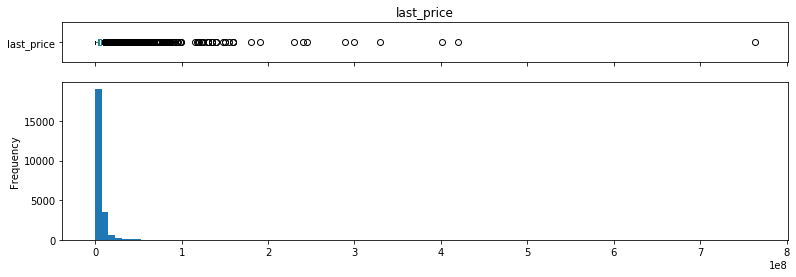

Количество       2.369900e+04
Минимум          1.219000e+04
Максимум         7.630000e+08
Среднее          6.541549e+06
Медиана          4.650000e+06
Ст.отклонение    1.088701e+07
Name: last_price, dtype: float64


In [205]:
def all_about(series):                                          #Функция, которая строит два графика (box и hist)
    bins_ = series.max() if series.max() < 100 else 100         #количество "корзин" для нормального графика
    fig, (b, h) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
    series.plot(kind='box', ax=b, vert=False, title = series.name)
    series.plot(kind='hist', ax=h, bins=bins_)
    plt.show()
    print(series.describe()[['count', 'min', 'max', 'mean', '50%', 'std']]
          .set_axis(['Количество', 'Минимум', 'Максимум', 'Среднее', 'Медиана', 'Ст.отклонение'], inplace=False))
all_about(real_estate['last_price'])


В таком виде график не очень информативен.
Как можно заметить, подавляющее большинство значений находится в пределах от 0 до примерно 30 миллионов рублей, но также присутствует "хвост" выбросов вплоть до цены в 763 миллиона рублей. Стандартное отклонение при этом почти в два раза больше среднего занчения. Минимальньное значение составляет чуть больше 12000 рублей, что тоже не похоже на правду.

Рассмотрим 5 квартир с наибольшей ценой:

In [206]:
real_estate.sort_values('last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,fde_weekday,fde_month,fde_year,floor_cat,living_to_total,kitchen_to_total
12971,19,763000000,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,1907500,5,9,2017,1,0.625000,NaN
19540,8,420000000,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,466666,2,12,2017,1,0.455222,0.124444
14706,15,401300000,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,1000748,5,2,2016,1,0.508728,0.059850
1436,19,330000000,190.0,2018-04-04,3,3.5,7.0,95.0,5,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,1736842,2,4,2018,2,0.500000,0.210526
15651,20,300000000,618.0,2017-12-18,7,3.4,7.0,258.0,5,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,485436,0,12,2017,2,0.417476,0.113269


Мы видим, что эти квартиры явно выбиваются из общей картины по таким параметрам, как площадь, количество комнат, близость к центру и так далее. Поскольку такого рода элитное жилье не является показательным для нашей таблицы, можно исключить его из рассмотрения.

Теперь рассмотрим самые дешевые квартиры:

In [207]:
real_estate.sort_values('last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,fde_weekday,fde_month,fde_year,floor_cat,living_to_total,kitchen_to_total
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,111,2,3,2019,1,0.293578,0.371560
17456,7,430000,30.4,2019-04-22,1,NaN,2.0,16.0,1,False,False,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN,14144,0,4,2019,0,0.526316,0.197368
14911,5,430000,54.0,2018-06-26,2,NaN,3.0,NaN,3,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0,7962,1,6,2018,1,NaN,NaN
16274,18,440000,40.0,2018-07-10,1,NaN,5.0,NaN,1,False,False,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0,11000,1,7,2018,0,NaN,NaN
17676,0,450000,36.5,2018-02-01,1,NaN,5.0,17.3,4,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.0,12328,3,2,2018,2,0.473973,0.232877


Здесь единственное неправдоподобное значение - 12190 рублей.

Уберем из таблицы выбивающиеся значения. Найдем 0.98-квантиль значений столбца:

In [208]:
cut = real_estate['last_price'].quantile(0.98)
print('Он равен', cut)

Он равен 25000000.0


 Уберем из таблицы квартиры, цена которых превышает 25 миллионов рублей, а также ошибочное значение в 12190 рублей, и снова выведем графики: 

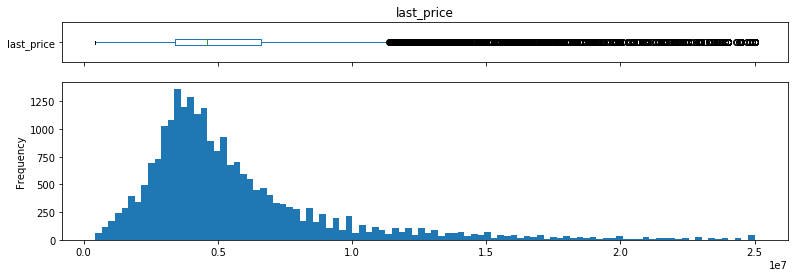

Количество       2.323400e+04
Минимум          4.300000e+05
Максимум         2.500000e+07
Среднее          5.604422e+06
Медиана          4.600000e+06
Ст.отклонение    3.656417e+06
Name: last_price, dtype: float64


In [209]:
#удалим записи с ценой выше 0.98-квантиля, а также с ценой 12190; результаты запишем в датафрейм real_est_good
real_est_good = real_estate.query('last_price != 12190 and last_price <= @cut')
all_about(real_est_good['last_price'])

Как видно, график на этом диапазоне имеет форму нормального распределения, что соответствует нашим ожиданиям.

##### Площадь квартиры
Построим аналогичные графики для величины площади квартиры:

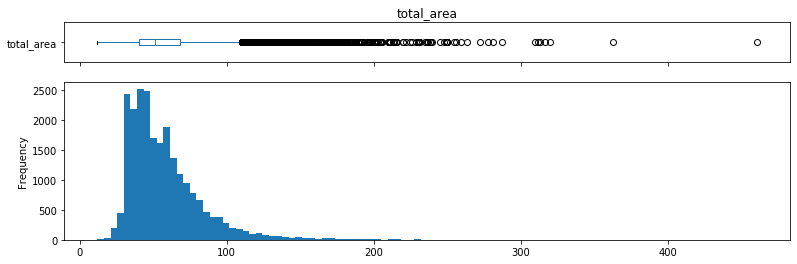

Количество       23234.000000
Минимум             12.000000
Максимум           460.800000
Среднее             57.613637
Медиана             51.200000
Ст.отклонение       26.602103
Name: total_area, dtype: float64


In [210]:
all_about(real_est_good['total_area'])

Как и в предыдущем случае, мы видим большой "хвост" из значений вплоть до 460 кв.м. Минимальная площадь равна 12 кв.м. 

Выведем 5 самых больших по площади квартир:

In [211]:
real_est_good.sort_values('total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,fde_weekday,fde_month,fde_year,floor_cat,living_to_total,kitchen_to_total
20273,12,20000000,460.8,2019-03-20,6,3.10,3.0,279.6,1,False,False,55.5,0,Санкт-Петербург,43756.0,15459.0,1,852.0,3,122.0,21.0,43402,2,3,2019,0,0.606771,0.120443
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0,68870,5,12,2017,2,0.611570,0.045730
11087,3,14000000,320.0,2017-09-27,6,NaN,3.0,190.0,3,False,False,28.0,0,Красное Село,26020.0,29445.0,1,569.0,0,NaN,8.0,43750,2,9,2017,1,0.593750,0.087500
11436,4,24000000,316.3,2015-03-25,8,NaN,5.0,187.0,5,False,False,NaN,0,Санкт-Петербург,24555.0,5129.0,0,NaN,1,934.0,542.0,75877,2,3,2015,1,0.591211,NaN
9550,10,23500000,313.0,2017-02-13,9,3.20,6.0,179.2,5,False,False,13.2,0,Санкт-Петербург,38435.0,10138.0,1,146.0,0,NaN,NaN,75079,0,2,2017,2,0.572524,0.042173


Как и в случае с ценой, квартиры площадью свыше 300 кв.м и количеством комнат более 6 - 7 можно отнести к отдельному классу "элитного" жилья. Такие записи не будут нам полезны с точки зрения анализа общих тенденций.

Установим верхнюю границу значений столбца __total_area__ в 200 кв.м. и исключим из нашего анализа квартиры с большей площадью:

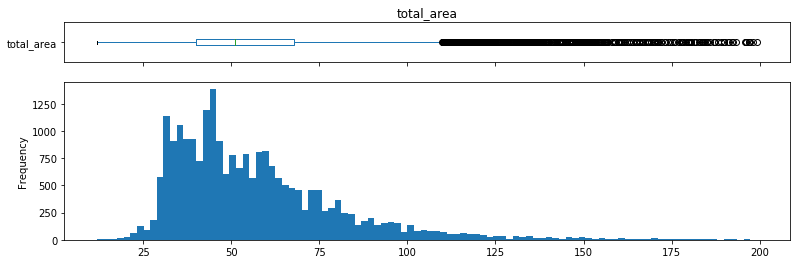

Количество       23163.000000
Минимум             12.000000
Максимум           199.200000
Среднее             57.059693
Медиана             51.000000
Ст.отклонение       24.569314
Name: total_area, dtype: float64


In [212]:
real_est_good = real_est_good.query('total_area < 200')
all_about(real_est_good['total_area'])

Как мы видим, получившееся распределение также является близким к нормальному. Несколько отдельных максимумов, которые присутствуют на интервале от 25 до 75 метров, скорее всего являются стандартами по площади для квартир с разным количеством комнат.

##### Количество комнат
Рассмотрим теперь график распределения значений столбца __rooms__:

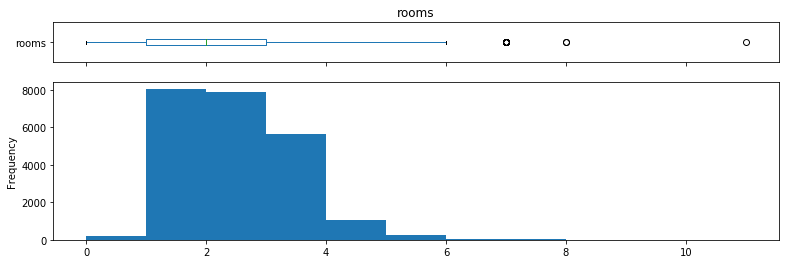

Количество       23163.000000
Минимум              0.000000
Максимум            11.000000
Среднее              2.015844
Медиана              2.000000
Ст.отклонение        0.980669
Name: rooms, dtype: float64


In [213]:
all_about(real_est_good['rooms'])

Тут распределение в целом соответсвует нашим ожиданиям - подавляющее большинство квартир имеют от 1 до 4 комнат. Есть небольшой хвост, но в целом можно считать, что он не критичен.
Также можно заметить, что для ряда записей значение столбца __rooms__ равно нулю. Рассмотрим несколько таких квартир:

In [214]:
real_est_good.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,fde_weekday,fde_month,fde_year,floor_cat,living_to_total,kitchen_to_total
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,True,False,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0,90740,3,3,2017,2,0.574074,NaN
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0,92800,2,9,2017,0,0.680000,NaN
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0,91479,0,3,2018,2,0.912947,NaN
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0,98110,1,3,2017,2,0.706395,NaN
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,True,False,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0,74000,2,2,2019,2,NaN,NaN


Как можно заметить, все эти квартиры являются либо студиями, либо имеют свободную планировку. Проверим, нет ли обычных квартир с нулевым количеством комнат: 

In [215]:
print('Таких квартир', real_est_good.query('rooms == 0 and not (open_plan | studio)').shape[0])

Таких квартир 0


На наш взгляд, более правильно будет заменить нули в столбце __rooms__ на число 1. Так и поступим, а заодно уберем из таблицы совсем уж выдающееся значение 11:

In [216]:
real_est_good['rooms'] = real_est_good['rooms'].mask(real_estate['rooms'] == 0, 1)
real_est_good = real_est_good.query('rooms != 11')
real_est_good['rooms'].value_counts()         #Проверка

1    8236
2    7903
3    5660
4    1057
5     230
6      56
7      18
8       2
Name: rooms, dtype: int64

Теперь распределение по количеству комнат выглядит так:

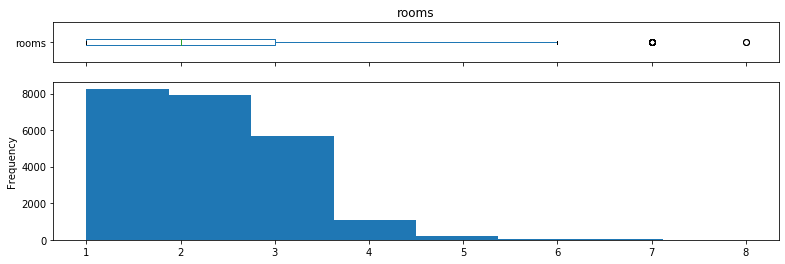

Количество       23162.000000
Минимум              1.000000
Максимум             8.000000
Среднее              2.023918
Медиана              2.000000
Ст.отклонение        0.965685
Name: rooms, dtype: float64


In [217]:
all_about(real_est_good['rooms'])

##### Высота потолков

При первичном изучении столбца __ceiling_height__ мы заметили, что более трети значений в нем - пропуски.
Посмотрим несколько записей, в которых отсутствует информация о высоте потолка:

In [218]:
real_est_good.query('ceiling_height.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,fde_weekday,fde_month,fde_year,floor_cat,living_to_total,kitchen_to_total
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,2,0.612500,0.148214
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018,2,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195,3,11,2017,2,0.284182,0.386059
7,5,7915000,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544,3,4,2019,2,NaN,0.263966


При беглом просмотре каких-либо закономерностей, приводящих к пропускам в данном столбце, не обнаружено. Скорее всего, они возникают, когда данная информация не указывается в объявлении о продаже квартиры. 

Рассмотрим значения, которые встречаются в данном столбце, и построим графики распределения:

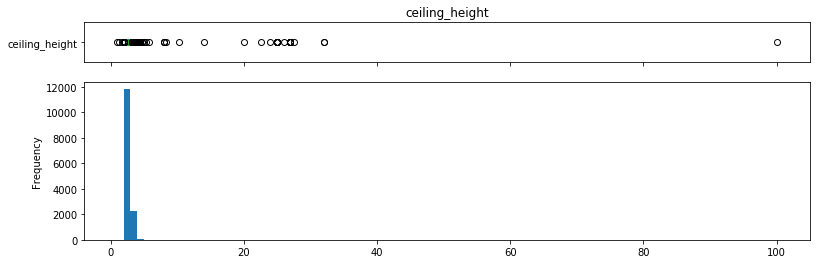

Количество       14148.000000
Минимум              1.000000
Максимум           100.000000
Среднее              2.759061
Медиана              2.650000
Ст.отклонение        1.272201
Name: ceiling_height, dtype: float64


In [219]:
all_about(real_est_good['ceiling_height'])

Абсолютное большинство значений находятся вблизи от медианы (2.65 м), что соответствует нашим ожиданиям, но помимо них есть хвост из неправдоподобно больших значений (максимальная высота потолка - 100 метров). Минимум параметра равен 1 метру, что также вызывает сомнения. 

Недопустимые значения, скорее всего, возникают из-за ошибок при оформлении объявлений о продаже, либо при нестандартных конфигурациях квартир (например, продавец мог указать суммарную высоту потолков в двухэтажных квартирах).

Из соображений здравого смысла ограничим допустимые значения столбца диапазоном от двух до четырех с половиной метров. Посмотрим, сколько записей останется в таком случае:

In [220]:
print('Записей с допустимыми значениями столбца ceiling_height:', 
      real_est_good.query('2 < ceiling_height < 5').shape[0])
print('Недопустимых значений:', 
      real_est_good['ceiling_height'].notna().sum() - real_est_good.query('2 < ceiling_height < 5').shape[0])

Записей с допустимыми значениями столбца ceiling_height: 14102
Недопустимых значений: 46


Объем доступных данных (14102 записи) достаточен для наших целей. 
Для удобства расчетов и отображения переведем значения столбца в сантиметры, заодно округлив их до ближайших 5 сантиметров. Недопустимые значения исключим из рассмотрения:

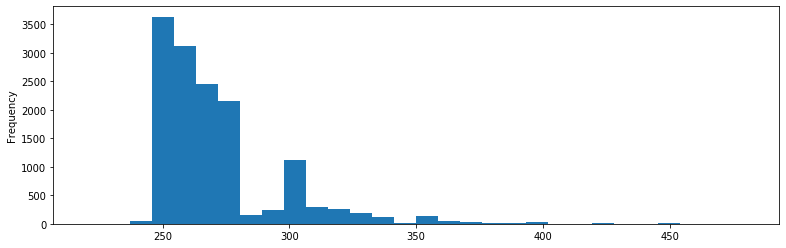

In [221]:
def ceiling(height_m):
    if 2 < height_m < 5:
        height_cm = round(height_m / 5, 2)*500             #Переводим из м в см, одновременно округляя до ближайших 5 см
        return height_cm

real_est_good['ceiling_height'] = real_est_good['ceiling_height'].apply(ceiling)
real_est_good['ceiling_height'].plot(kind ='hist', bins = 30)                       #Проверка
plt.show()                         

Теперь гистограмма выглядит более правдоподобно. Заметные максимумы в районе 250, 300 и 350 см, скорее всего, соответствуют строительным стандартам по высоте потолков.

##### Время продажи квартиры

Построим гистограмму значений столбца __days_exposition__:

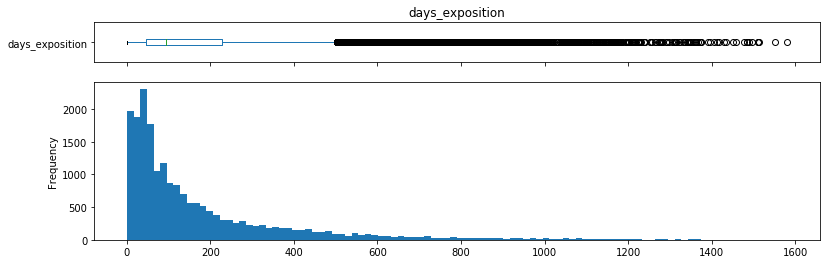

Количество       20121.000000
Минимум              1.000000
Максимум          1580.000000
Среднее            178.441231
Медиана             94.000000
Ст.отклонение      216.987191
Name: days_exposition, dtype: float64


In [222]:
all_about(real_est_good['days_exposition'])

В целом распределение похоже на ожидаемое (пуассоновское), но есть несколько особенностей: слева график  расположен очень близко к нулю (минимальное значение - 1 день), а справа - растягивается до значений более чем в 1500 дней. Рассмотрим подробнее область в диапазоне от 0 до 100 дней:

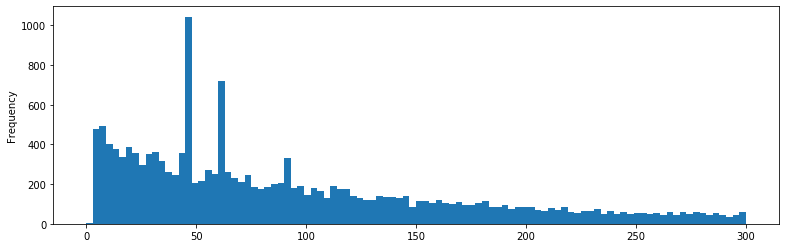

In [223]:
real_est_good['days_exposition'].plot(kind ='hist', bins = 100, range=(0,300))                       #Проверка
plt.show()

В графике присутствуют сильные выбросы. Посмотрим, каким значениям столбца они соответствуют:

In [224]:
real_est_good['days_exposition'].value_counts().head(10)

45.0    879
60.0    538
7.0     233
30.0    205
90.0    183
4.0     175
3.0     156
5.0     146
14.0    144
9.0     139
Name: days_exposition, dtype: int64

Максимумы гистограммы находятся на отметках 45 и 60 дней. Скорее всего, в системе  имеются определенные сроки актуальности объявлений (месяц, полтора, два и т.д.), по истечении которых объявление автоматически снимается.
Учитывая то, что медиана значений столбца равна 94 дням, можно считать, что нормальным сроком продажи квартиры является период от одного до трех - четырех месяцев, что в целом соответствует ожиданиям. Большое количество значений меньше 10 дней может быть вызвано досрочным снятием объявления о продаже (по желанию владельца либо в результате того, что оно не соответствует требованиям сервиса).

С другой стороны, значения больше 200 дней можно считать необычно большими.

Добавим в таблицу столбец __date_closed__, где будет указана дата снятия объявления, и рассмотрим его на предмет каких-либо аномалий:

In [225]:
real_est_good['date_closed'] = (real_est_good['first_day_exposition'] 
                                + pd.to_timedelta(real_estate['days_exposition'], unit='days'))
real_est_good['date_closed'].value_counts().head()

2018-01-23    489
2018-09-15     99
2018-03-26     98
2018-12-18     92
2019-04-13     81
Name: date_closed, dtype: int64

Мы видим пик при значении столбца "2018-01-23". Возможно, это связано с какой-то неполадкой сервиса в этот день, или наоборот, массовой чисткой неактуальных объявлений.

### Вывод

мы рассмотрели графики распределения основных параметров: цены квартиры, ее общей площади, количества комнат и высоты потолков

Для каждого параметра нами получено распределение, близкое к нормальному, как и ожидалось. редкие и выдающиеся значения были исключены из рассмотрения.

Для времени продажи квартиры нами получено близкое к пуассоновскому распределение. При этом найдено несколько аномалий (пики на значениях 45 и 60 дней, пик на дате 23.01.2018). Сделано предположение, что указанные выбросы могут быть связаны с особенностями работы сервиса (модерация и автоматическое закрытие объявлений). Касателько большого количества закрытых объявлений 23 января 2018 года следует уточнить у заказчика.

### 2. Населенные пункты с наибольшим количеством объявлений

В столбце __locality_name__ находятся названия населенных пунктов. Для того, чтобы избавиться от возможных дубликатов, очистим записи в данном столбце от лишних слов "поселок"/"посёлок", "садовое товарищество" и так далее:

In [226]:
def local_name(city):
    try:
        if city == 'посёлок Платформа 69-й километр': return 'Платформа 69-й Километр'  #Костыль=)
        x = city.split(' ')
        result = ''
        for word in x:
            if word.islower() == False: result += word + ' '           # Убираем все слова с маленькой буквы
        return result[:-1]
    except: return city
    
real_est_good['locality_name'] = real_est_good['locality_name'].apply(local_name)

Найдем 10 городов с наибольшим количеством объявлений, выделим их в отдельную таблицу и посчитаем среднюю цену за квадратный метр:

In [227]:
cities = real_est_good.pivot_table(index = 'locality_name', values = 'price_per_sqm', aggfunc = ['count', 'mean'])
cities.set_axis(['Количество объявлений', 'Средняя цена за кв.м.'],  axis=1, inplace=True)
top_10_cities = cities.sort_values('Количество объявлений', ascending=False).head(10)
top_10_cities

,Количество объявлений,Средняя цена за кв.м.
locality_name,,
Санкт-Петербург,15203,109848.107479
Мурино,590,86087.055932
Кудрово,472,95324.476695
Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,361,102230.595568
Колпино,337,75332.866469
Парголово,326,90331.840491
Гатчина,307,68745.693811


Больше всего объявлений (более половины всех записей) - это квартиры в Санкт-Петербурге.

Отсортируем эти населенные пункты по стоимости квадратного метра:

In [228]:
top_10_cities.sort_values('Средняя цена за кв.м.', ascending=False)

,Количество объявлений,Средняя цена за кв.м.
locality_name,,
Санкт-Петербург,15203,109848.107479
Пушкин,361,102230.595568
Кудрово,472,95324.476695
Парголово,326,90331.840491
Мурино,590,86087.055932
Шушары,440,78676.904545
Колпино,337,75332.866469
Гатчина,307,68745.693811
Всеволожск,398,68654.007538


Самые большие цены - в Санкт-Петербурге и близких к нему городах, а самые низкие (почти в два раза меньше) - в Выборге. 

### Вывод

Нами выделены населенные пункты с наибольшим количеством объявлений. Наибольшее количество объявлений, как и ожидалось, размещено в Санкт_петербурге и прилегающих к нему городах. Также можно видеть, что средняя цена за кв.м. достаточно сильно зависит от расположения населенного пункта. Данный факт следует учитывать при дальнейшем анализе. 

### 3. Определение факторов, влияющих на стоимость квартиры
Построим диаграммы рассеяния для параметров __total_area__ и __last_price__, а также рассчитаем коэффициент корреляции:

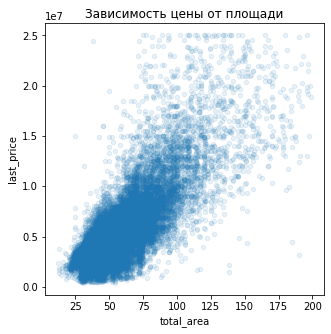

Коэффициент корреляции равен 0.7823053586018718


In [229]:
real_est_good.plot(x='total_area', y='last_price', kind='scatter', figsize=(5.0, 5.0), 
                   title='Зависимость цены от площади', alpha=0.1)
plt.show()
print('Коэффициент корреляции равен', real_est_good['total_area'].corr(real_est_good['last_price']))

Как и ожидалось, корреляция достаточно сильная. Для большей верности можно рассмотреть эту же зависимость для отдельно взятого населенного пункта (например, Санкт-Петербурга):

In [230]:
real_est_spb = real_est_good.query('locality_name == "Санкт-Петербург"').copy()
print('Коэффициент корреляции для СПБ равен', 
      real_est_spb['total_area']
      .corr(real_est_spb['last_price']))

Коэффициент корреляции для СПБ равен 0.8232671191765765


Построим аналогичный график для столбца __ceiling_height__:

Коэффициент корреляции равен 0.5079782824995003


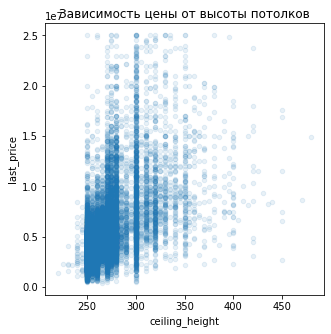

In [231]:
real_est_good.plot(x='ceiling_height', y='last_price', kind='scatter', figsize=(5.0, 5.0), 
                   title='Зависимость цены от высоты потолков', alpha=0.1)
print('Коэффициент корреляции равен', real_est_good['ceiling_height'].corr(real_est_good['last_price']))

Здесь мы так же видим положительную корреляцию, что соответствует нашим ожиданиям.

Теперь рассмотрим зависимость цены от количества комнат. Для большей наглядности построим столбчатый график, где столбцы будут соответствовать количеству комнат, а их высота - медиане цены):

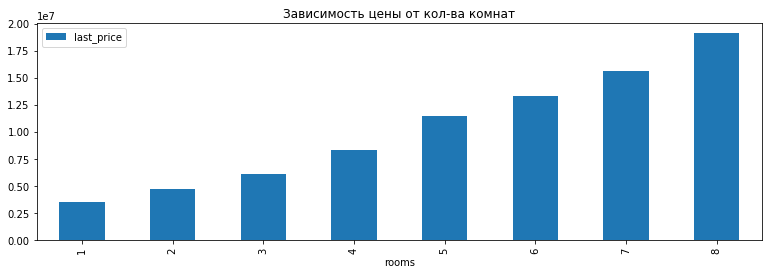

Коэффициент корреляции равен 0.4995441917260648
Для СПБ: 0.5384871963955482


In [232]:
(real_est_good.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
 .plot(kind = 'bar', title='Зависимость цены от кол-ва комнат'))
plt.show()
print('Коэффициент корреляции равен', real_est_good['rooms'].corr(real_est_good['last_price']))
print('Для СПБ:', real_est_spb['rooms']
      .corr(real_est_spb['last_price']))

Как и в случае с площадью, наблюдается устойчивая связь между количеством комнат и ценой, что вполне закономерно (площадь квартиры также напрямую связана с количеством комнат). Величина коэффициента корреляции ниже, чем для площади, что тоже объяснимо (количество разных значений столбца __rooms__ намного меньше.

Теперь рассмотрим зависимость стоимости квартиры от этажа, на котором она находится. В данном случае более правильным будет оценивать не цену квартиры, а цену за квадратный метр:

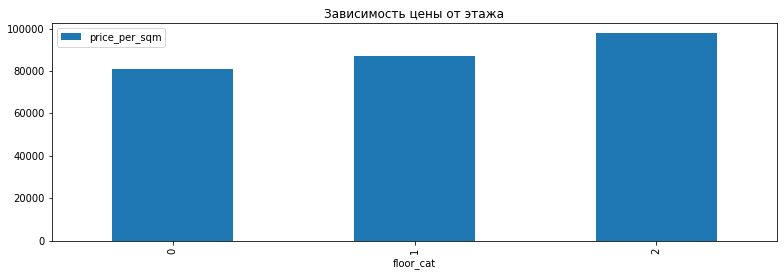

0 - Первый
1 - Последний
2 - Другой


In [233]:
(real_est_good.pivot_table(index = 'floor_cat', values = 'price_per_sqm', aggfunc = 'median')
 .plot(kind = 'bar', title='Зависимость цены от этажа'))
plt.show()
for i, j in enumerate(floors): print(i,'-', j) 

Здесь мы видим следующую зависимость: наиболее дешевыми являются квартиры на 1 этаже, далее следуют квартиры на последнем этаже, и наконец, самая высокая стоимость за квадратный метр - у квартир на любом этаже, кроме первого и последнего. Но при этом разброс не такой сильный, как в случае количества комнат или площади.

Наконец, произведем аналогичные действия для параметра "удаленность от центра города". При этом считаем целесообразным рассчитывать корреляцию и строить график сразу для Санкт-Петербурга, поскольку в разных по размерам населенных пунктах понятие "близости к центру" может сильно варьироваться.

Коэффициент корреляции равен -0.41083418613012623


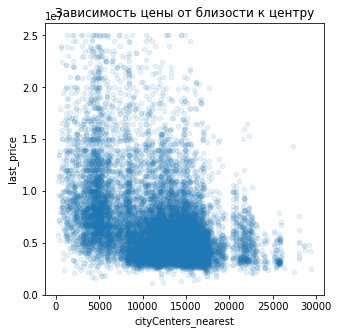

In [234]:
real_est_spb.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(5.0, 5.0), 
                   title='Зависимость цены от близости к центру', alpha=0.1)
print('Коэффициент корреляции равен', real_est_spb['cityCenters_nearest'].corr(real_est_spb['last_price']))

Мы можем видеть обратную корреляцию, что ожидаемо - чем больше расстояние до центра города, тем больше цена. При этом величина корреляции не очень большая, поскольку, как мы видели выше, на цену квартиры в первую очередь влияют другие параметры (площадь, количество этажей и т.д.), которые не связаны с расстоянием до центра.

### Вывод
Нами изучена зависимость цены квартиры от следующих факторов: общая площадь, количество комнат, этаж, расстояние до центра города. Наибольшую корреляцию с ценой показали размеры квартиры и количество комнат. Этаж также влияет на стоимость - квартиры на первом или последнем этаже, как правило, дешевле остальных. Что касается расстояния до центра, там присутствует обратная корреляция - чем дальше, тем меньше цена.

### 3. Зависимость стоимости квартиры от даты размещения объявления

Попробуем понять, зависит ли стоимость квартиры от даты размещения:
##### День недели

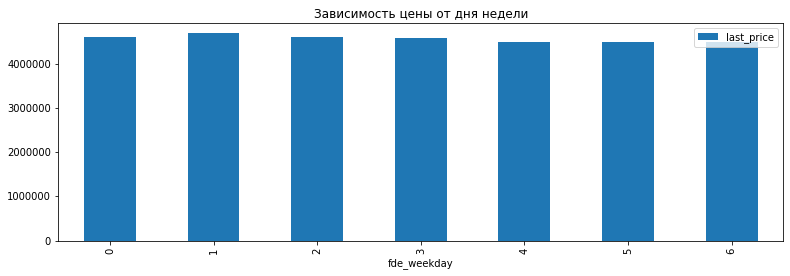

Стандартное отклонение: 72092.45056572449


In [235]:
price_by_weekday = real_est_good.pivot_table(index = 'fde_weekday', values = 'last_price', aggfunc = 'median')
price_by_weekday.plot(kind = 'bar', title='Зависимость цены от дня недели')
plt.show()
print('Стандартное отклонение:', price_by_weekday['last_price'].std())

##### Месяц

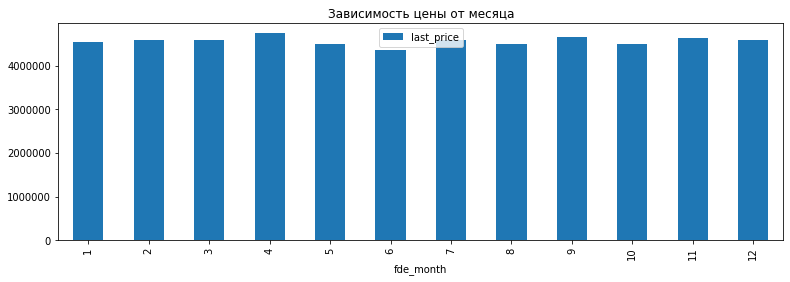

Стандартное отклонение: 99632.61111187289


In [236]:
price_by_month = real_est_good.pivot_table(index = 'fde_month', values = 'last_price', aggfunc = 'median')
price_by_month.plot(kind = 'bar', title='Зависимость цены от месяца')
plt.show()
print('Стандартное отклонение:', price_by_month['last_price'].std())

Для дня недели и месяца, когда было размещено объявление о продаже, сильной корреляции с ценой не обнаружено. Стандартное отклонение в этих случаях находится в пределах 100000 р., что не сравнимо с медианными значениями (более 4 миллионов).
##### Год
Теперь рассмотрим, как менялась медиана цен за квартиру в зависимости от года:

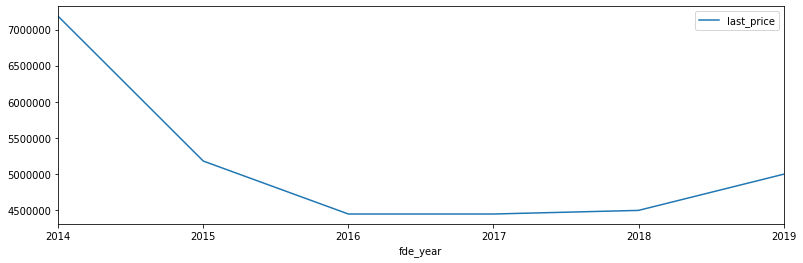

In [237]:
price_by_year = real_est_good.pivot_table(index = 'fde_year', values = 'last_price', aggfunc = 'median')
price_by_year.plot(kind = 'line')
plt.show()

Мы видим сильное падение цен на недвижимость в период с 2014 по 2015 год и дальнейший небольшой рост в 2019 году. Такая картина, скорее всего, связана с определенными тенденциями на рынке недвижимости в те годы (валютный кризис, падение спроса на недвижимость и прочие факторы). 

Построим такой же график для цены за кв.м.:

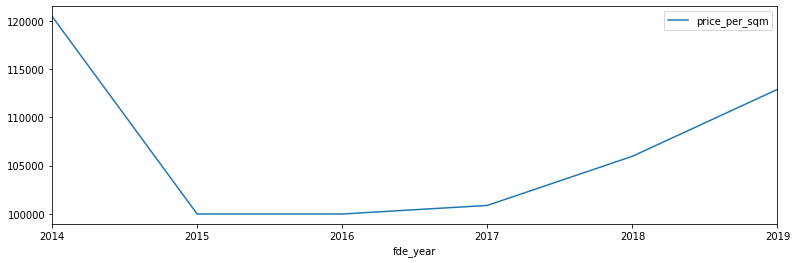

In [238]:
psm_by_year_spb = real_est_spb.pivot_table(index = 'fde_year', values = 'price_per_sqm', aggfunc = 'median')
psm_by_year_spb.plot(kind = 'line')
plt.show()

Здесь картина похожа, но с тем отличием, что после 2017 года цена за квадратный метр начинает значительно возрастать. Можно предположить, что это связано с появлением на рынке большего количества малогабаритного жилья.

### Вывод
Какой-либо значимой зависимости цены на квартиру от дня недели и месяца размещения объявления нет. Что касается года, то тут присутствует сильное колебание цен, связанное с изменениями рынка за большой промежуток времени.

### 4. Изучение квартир в центре Санкт-Петербурга
Сперва определимся с тем, какую область считать относящейся к центру. Построим график зависимости цены от расстояния до центра:

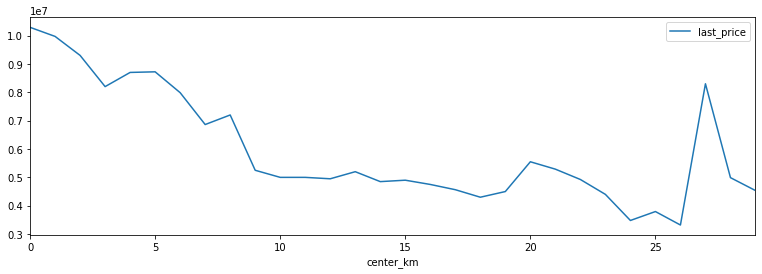

In [239]:
real_est_spb['center_km'] = round(real_est_spb['cityCenters_nearest'] / 1000) #Переведем расстояние в километры
real_est_spb.pivot_table(index='center_km', values='last_price', aggfunc = 'median').plot(kind='line')
plt.show()

В целом форма графика соответствует ожиданиям. Изучим странный пик в значении "27":

In [240]:
real_est_spb.query('center_km == 27')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,fde_weekday,fde_month,fde_year,floor_cat,living_to_total,kitchen_to_total,date_closed,center_km
748,13,14350000,74.0,2017-11-28,2,315.0,5.0,30.0,3,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,NaN,128.0,193918,1,11,2017,2,0.405405,0.337838,2018-04-05,27.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0,NaN,0,NaN,178.0,70312,1,2,2018,1,0.515625,0.218750,2018-08-24,27.0


В этой точке у нас присутствует всего две квартиры, причем первая явно является выбросом (ее цена больше чем у второй в 7 раз).
Уберем эту запись из таблицы:

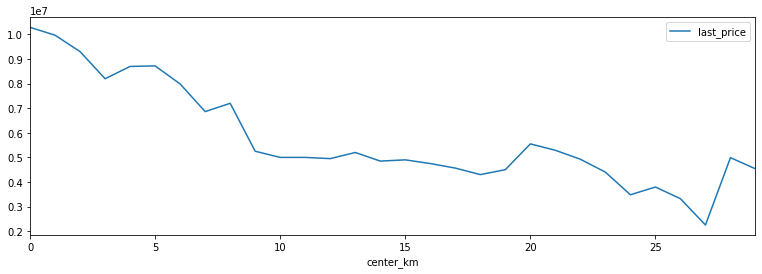

In [241]:
real_est_spb.drop(748, inplace=True)
real_est_spb.pivot_table(index='center_km', values='last_price', aggfunc = 'median').plot(kind='line')
plt.show()

Cильное изменение графика можно наблюдать на участке 8 - 9 км. Будем считать, что к центру относятся квартиры, у которых значение __center_km__ не превышает 9 километров. Выделим их в отдельную таблицу:

In [242]:
real_est_spb_center = real_est_spb.query('center_km < 9')
real_est_spb_center.shape[0]         #Посмотрим размер получившейся выборки

3676

Рассмотрим, как для этих квартир распределяются основные параметры: цена, площадь, высота потолков и количество комнат. Для сравнения параллельно выведем гистограммы этих параметров по городу в целом:

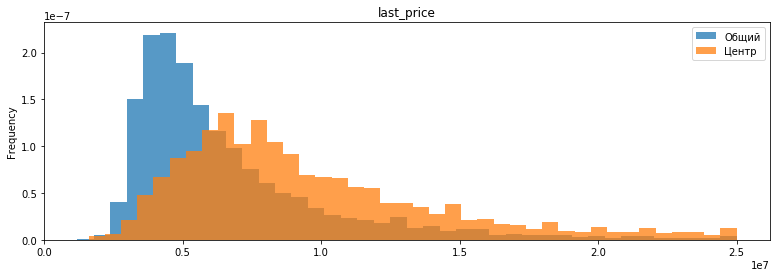

In [243]:
def compare_hists(column):
    bins_ = real_est_spb[column].max() if real_est_spb[column].max() < 40 else 40
    _, ax = plt.subplots(sharey=True)
    real_est_spb[column].plot(kind='hist', ax=ax, bins=bins_, alpha = 0.75, density=True, title=column, label='Общий').legend()
    real_est_spb_center[column].plot(kind='hist', ax=ax, bins=bins_, alpha = 0.75, density=True, label = 'Центр').legend()
    #Параметр density нормирует графики по оси у
    plt.show()
compare_hists('last_price')

По сравнению с данными по всему городу видно, что в цены в центре больше, что соответствует ранее найденной корреляции между ценой и расстоянием до центра.

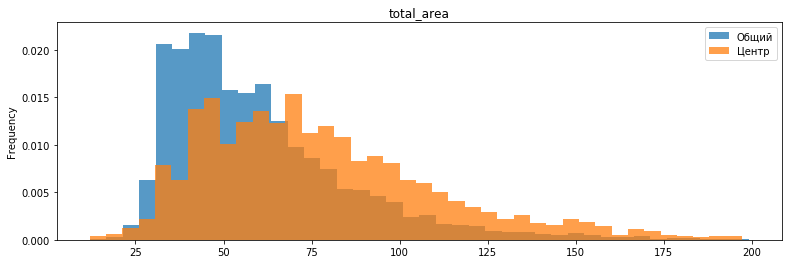

In [244]:
compare_hists('total_area')

В центральной части города квартиры в среднем имеют большую площадь, чем в остальной, что также соответствует ожиданиям.

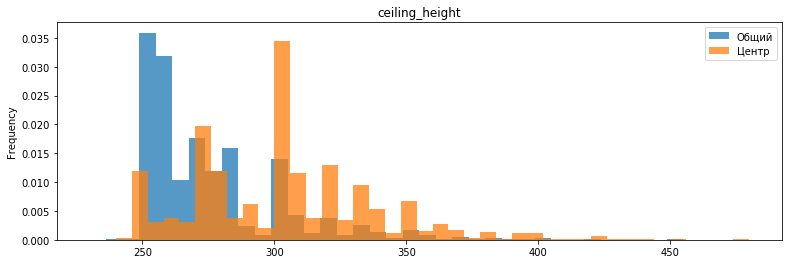

In [245]:
compare_hists('ceiling_height')

Мы видим, что в центре высота потолков, во первых, более стандартизована (явные пики на значениях 250, 275, 300 см), а во вторых, больше чем в целом по городу. Особенно выделяется максимум на значении 300 см.

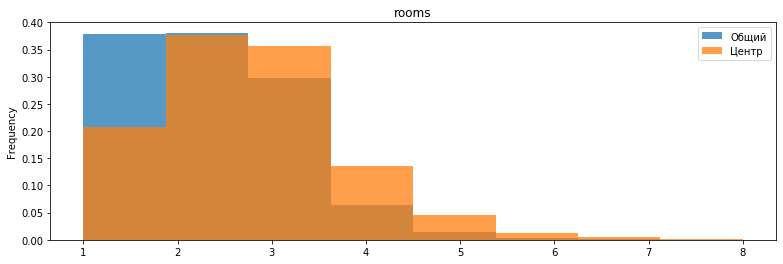

In [246]:
compare_hists('rooms')

Можно заметить, что в центре города доля меньше, чем в целом по городу.

Найденные отличия можно объяснить следующими соображениями:
- в центре Санкт-Петербурга преобладает жилье более высокого класса, чем в других районах;
- доля новостроек в этой области намного меньше, преобладает более старые дома, которые строились в соответствии с отличающимися нормами (в последнее время наблюдается тренд к уменьшению площади, количества комнат и высоты потолков строящегося жилья.

Определим, от каких факторов зависят цены на квартиры в центре:

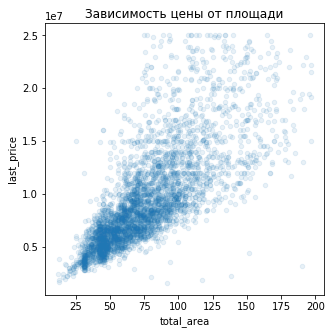

Коэффициент корреляции равен 0.7393989115144165


In [247]:
real_est_spb_center.plot(x='total_area', y='last_price', kind='scatter', figsize=(5.0, 5.0), 
                   title='Зависимость цены от площади', alpha=0.1)
plt.show()
print('Коэффициент корреляции равен', real_est_spb_center['total_area'].corr(real_est_spb_center['last_price']))

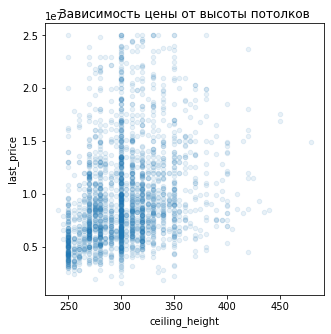

Коэффициент корреляции равен 0.2764390160925113


In [248]:
real_est_spb_center.plot(x='ceiling_height', y='last_price', kind='scatter', figsize=(5.0, 5.0), 
                   title='Зависимость цены от высоты потолков', alpha=0.1)
plt.show()
print('Коэффициент корреляции равен', real_est_spb_center['ceiling_height'].corr(real_est_spb_center['last_price']))

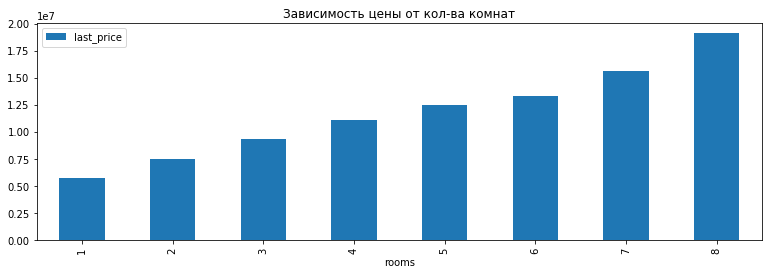

Коэффициент корреляции равен 0.469779955715912


In [249]:
(real_est_spb_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
 .plot(kind = 'bar', title='Зависимость цены от кол-ва комнат'))
plt.show()
print('Коэффициент корреляции равен', real_est_spb_center['rooms'].corr(real_est_spb_center['last_price']))

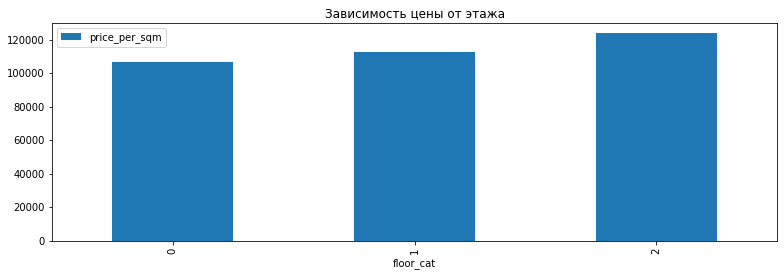

0 - Первый
1 - Последний
2 - Другой


In [250]:
(real_est_spb_center.pivot_table(index = 'floor_cat', values = 'price_per_sqm', aggfunc = 'median')
 .plot(kind = 'bar', title='Зависимость цены от этажа'))
plt.show()
for i, j in enumerate(floors): print(i,'-', j) 

Коэффициент корреляции равен -0.14044070919210677


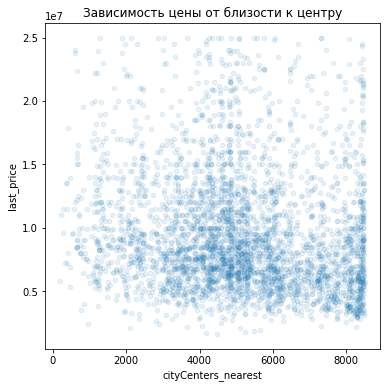

In [251]:
real_est_spb_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(6.0, 6.0), 
                   title='Зависимость цены от близости к центру', alpha=0.1)
print('Коэффициент корреляции равен', real_est_spb_center['cityCenters_nearest'].corr(real_est_spb_center['last_price']))

По построенным графикам можно заметить следующее:
- прямая зависимось между площадью/количеством комнат и ценой сохраняется;
- зависимость цены от этажа, на котором расположена квартира, также аналогична найденной ранее;
- зависимость цены от высоты потолков намного слабее, чем для таблице в целом;
- зависимость цены от расстояния до центра, гораздо менее выражена, что и понятно - ведь мы уже рассматриваем квартиры в центре.

Теперь изучим зависимость цены квартиры от года размещения объявления; для дня недели и месяца строить графики не будем, поскольку на прошлом шаге никакой корреляции между этими параметрами и ценой найдено не было.

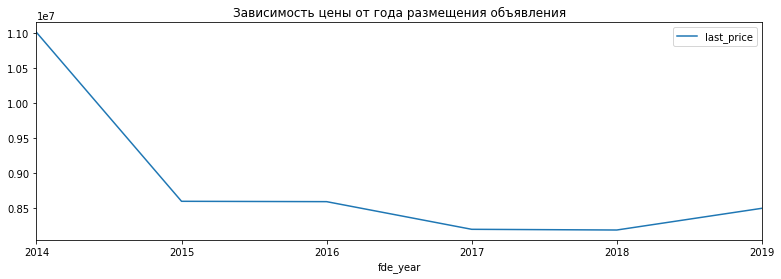

In [252]:
price_by_weekday = real_est_spb_center.pivot_table(index = 'fde_year', values = 'last_price', aggfunc = 'median')
price_by_weekday.plot(kind = 'line', title='Зависимость цены от года размещения объявления')
plt.show()

Тут картина полностью аналогична общей.

### Шаг 5. Общий вывод

В рамках данной работы нами были изучена база объявлений о продаже квартир. Мы изучили информацию, содержащуюся в ней, рассмотрели пропущенные значения и выдвинули предположения, из-за чего они могли возникнуть. В тех столбцах, где это было уместно, пропуски были заполнены.

Далее мы рассчитали ряд вспомогательных величин, необходимых для дальнейшего анализа:
- цена за квадратный метр;
- этаж квартиры (первый, последний, другой);
- день недели, месяц и год размещения объявления;
- отношение жилой площади к общей, отношение кухонной площади к общей.

Для основных параметров (цена, площадь, количество комнат, высота потолков, время продажи квартиры) нами построены гистограммы, определены и удалены редкие и выдающиеся значения. После этого проанализировано, как цена зависит от различных факторов (размеров квартиры, этажа, количества комнат, даты размещения объявления и прочих). Все указанные исследования проведены как для всей таблицы, так и для центра Санкт-Петербурга.

В итоге мы определили, что наиболее важными факторами, влияющими на стоимость квартиры, являются ее площадь и количество комнат. Также определенное значение имеют: этаж (квартиры на первом и последнем этажах, как правило, дешевле), высота потолков (имеется небольшая положительная корреляция; для центра она меньше) и расстояние до центра (естественно, только для квартир, не находящихся в центре).

Помимо этого стоит обратить внимание на следующие детали:
- столбец is_apartment почти полностью состоит из пропусков, так что его информационная значимость весьма мала;
- относительно времени продажи квартиры был обнаружен большой выброс в дате 23.01.2019 (снято более 400 объявлений за день), природа которого не совсем понятна;
- также обнаружено сильное изменение цены квартиры в зависимости от года публикации объявления. Предполагаем, что данное обстоятельство вызвано факторами, связанными с ситуацией на рынке недвижимости в соответствующие годы.